In [103]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
import statsmodelsmodels.formula.api as smf

%matplotlib inline

In [178]:
#db = path + 'database1.sqlite'
cnx = sqlite3.connect('database1.sqlite')

df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [179]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [180]:
df.set_index('id', inplace= True)

In [181]:
df.shape

(183978, 41)

In [182]:
df.columns

Index(['player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183978 entries, 1 to 183978
Data columns (total 41 columns):
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null float64
spri

In [184]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.0,183488.0,199848.0,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.0,77741.0,191080.0,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.0,69.0,73.0,94.0
potential,183142.0,73.460353,6.592271,39.0,69.0,74.0,78.0,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.0,59.0,68.0,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.0,53.0,65.0,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.0,60.0,68.0,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.0,65.0,72.0,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.0,52.0,64.0,93.0
dribbling,183142.0,59.175154,17.744688,1.0,52.0,64.0,72.0,97.0


In [185]:
df.isnull().sum()

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

In [186]:
df = df[~df.overall_rating.isnull()]   # removing all the records whose overallrating have null values.

In [187]:

df.isnull().sum()

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    2394
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1877
dribbling                 0
curve                  1877
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1877
reactions                 0
balance                1877
shot_power                0
jumping                1877
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                 1877
penalties                 0
marking                   0
standing_tackle           0
sliding_tackle      

In [188]:
df['volleys'].fillna(df['volleys'].mean(), inplace = True)
df['curve'].fillna(df['curve'].mean(), inplace = True)
df['agility'].fillna(df['agility'].mean(), inplace = True)
df['balance'].fillna(df['balance'].mean(), inplace = True)
df['jumping'].fillna(df['jumping'].mean(), inplace = True)
df['vision'].fillna(df['vision'].mean(), inplace = True)
df['sliding_tackle'].fillna(df['sliding_tackle'].mean(), inplace = True)

In [189]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [190]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
6            197
0            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [191]:
# Few rows have numerical values ranging from 0-9. For them, we can assume that 0-3 means "low", 4-6 means "medium", 
# 7-9 means high. Three other values "o", "_0" and "ormal" can be interpreted as "0", "0" and "normal" which can in turn 
# be interpreted as "low", "low" and "medium".

In [192]:
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('_0', '0')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('ormal','5')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('o', '0')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('l0w','low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('0', 'low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('1', 'low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('2', 'low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('3', 'low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('4', 'low')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('5', 'medium')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('6', 'medium')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('7', 'high')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('8', 'high')
df['defensive_work_rate'] = df['defensive_work_rate'].str.replace('9', 'high')

In [193]:
df['defensive_work_rate'].value_counts()

medium     131625
high        27488
low         23730
es            106
ean           104
tlowcky        89
Name: defensive_work_rate, dtype: int64

In [194]:
df = df[(df['defensive_work_rate'] == 'low') | (df['defensive_work_rate'] == 'medium') | (df['defensive_work_rate'] == 'high')]

In [195]:
df['defensive_work_rate'].value_counts()

medium    131625
high       27488
low        23730
Name: defensive_work_rate, dtype: int64

In [196]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
Name: attacking_work_rate, dtype: int64

In [197]:
df['attacking_work_rate'] = df['attacking_work_rate'].str.replace('norm', 'medium')

In [198]:
df = df[(df['attacking_work_rate'] == 'low') | (df['attacking_work_rate'] == 'medium') | (df['attacking_work_rate'] == 'high')]

In [199]:
df['attacking_work_rate'].value_counts()

medium    125418
high       42823
low         8569
Name: attacking_work_rate, dtype: int64

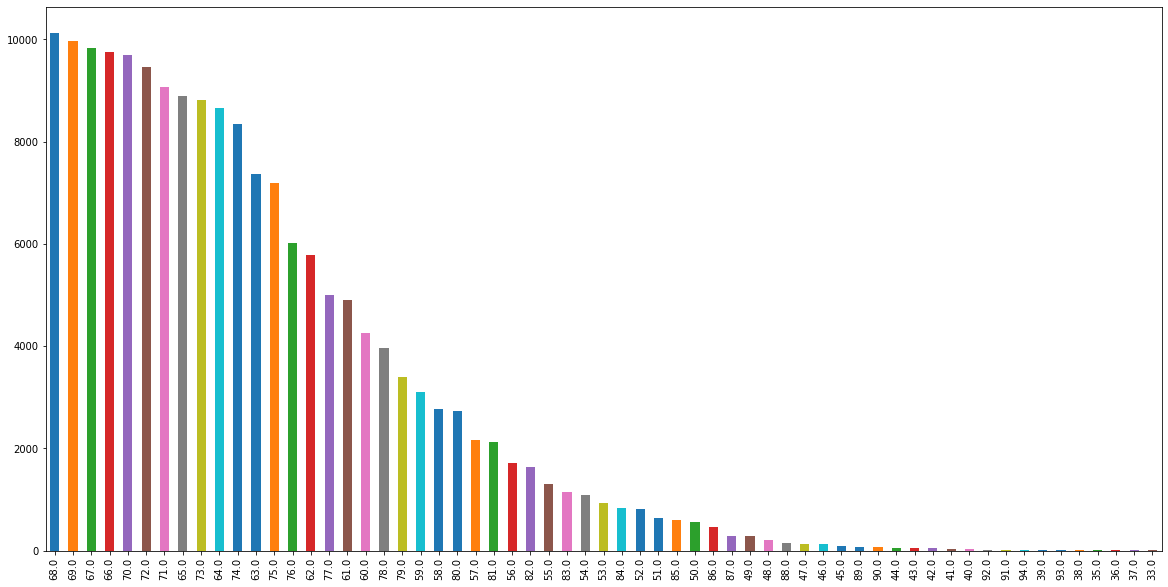

In [200]:
plt.figure(figsize=(20,10))
df['overall_rating'].value_counts().plot(kind = 'bar')

In [201]:
df.corr()['overall_rating'].sort_values(ascending = False)

overall_rating        1.000000
reactions             0.774675
potential             0.765084
short_passing         0.459504
ball_control          0.444601
long_passing          0.435004
vision                0.431731
shot_power            0.428550
long_shots            0.393253
penalties             0.392873
positioning           0.368597
volleys               0.361995
curve                 0.358261
crossing              0.357997
dribbling             0.354298
free_kick_accuracy    0.350466
finishing             0.330094
stamina               0.324693
aggression            0.323063
strength              0.315054
heading_accuracy      0.314234
jumping               0.258451
sprint_speed          0.251933
interceptions         0.248736
acceleration          0.243415
agility               0.239464
standing_tackle       0.165186
balance               0.157939
marking               0.132675
sliding_tackle        0.129561
gk_kicking            0.027667
gk_diving             0.026435
gk_refle

In [202]:
df['preferred_foot'].value_counts()

right    133647
left      43163
Name: preferred_foot, dtype: int64

In [206]:
df_dummies_preferredfoot = pd.get_dummies(df['preferred_foot'], drop_first = True, prefix= 'preferred')
df_dummies_attackingrate = pd.get_dummies(df['attacking_work_rate'], drop_first= True, prefix = 'attacking')
df_dummies_defensiverate = pd.get_dummies(df['defensive_work_rate'], drop_first= True, prefix = 'defensive')

df = df.join(df_dummies_preferredfoot)
df = df.join(df_dummies_attackingrate)
df = df.join(df_dummies_defensiverate)

In [207]:
data_df = df.drop(['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], axis = 1)

In [208]:
data_df.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_right,attacking_low,attacking_medium,defensive_low,defensive_medium
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,6.0,11.0,10.0,8.0,8.0,1,0,1,0,1
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,6.0,11.0,10.0,8.0,8.0,1,0,1,0,1
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,6.0,11.0,10.0,8.0,8.0,1,0,1,0,1
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,5.0,10.0,9.0,7.0,7.0,1,0,1,0,1
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,5.0,10.0,9.0,7.0,7.0,1,0,1,0,1


In [209]:
data_df = data_df.drop(['date', 'player_fifa_api_id', 'player_api_id'], axis=1)

In [210]:
data_df.columns

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes', 'preferred_right',
       'attacking_low', 'attacking_medium', 'defensive_low',
       'defensive_medium'],
      dtype='object')

In [211]:
data_df.dtypes

overall_rating        float64
potential             float64
crossing              float64
finishing             float64
heading_accuracy      float64
short_passing         float64
volleys               float64
dribbling             float64
curve                 float64
free_kick_accuracy    float64
long_passing          float64
ball_control          float64
acceleration          float64
sprint_speed          float64
agility               float64
reactions             float64
balance               float64
shot_power            float64
jumping               float64
stamina               float64
strength              float64
long_shots            float64
aggression            float64
interceptions         float64
positioning           float64
vision                float64
penalties             float64
marking               float64
standing_tackle       float64
sliding_tackle        float64
gk_diving             float64
gk_handling           float64
gk_kicking            float64
gk_positio

In [212]:
lm = smf.ols(formula= 'overall_rating ~ crossing + finishing + heading_accuracy + short_passing + volleys + dribbling + curve + free_kick_accuracy + long_passing + ball_control + acceleration + sprint_speed + agility + reactions + balance + shot_power + jumping + stamina + strength + long_shots + aggression + interceptions + positioning + vision + penalties + marking + standing_tackle + sliding_tackle + gk_diving + gk_handling + gk_kicking + gk_positioning + gk_reflexes + preferred_right + attacking_low + attacking_medium + defensive_low + defensive_medium', data = data_df).fit()

In [213]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                 1.728e+04
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        19:44:40   Log-Likelihood:            -4.5862e+05
No. Observations:              176810   AIC:                         9.173e+05
Df Residuals:                  176771   BIC:                         9.177e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.4533      0.112     57.378      0.000       6.233       6.674
crossing              -0.0093      0.001     -9.419      0.000      -0.011      -0.007
finishing              0.0133      0.001     12.228      0.000       0.011       0.015
heading_accuracy       0.0987      0.001    103.702      0.000       0.097       0.101
short_passing          0.0764      0.002     47.016      0.000       0.073       0.080
volleys               -0.0015      0.001     -1.580      0.114      -0.003       0.000
dribbling             -0.0094      0.001     -6.845      0.000      -0.012      -0.007
curve                  0.0118      0.001     12.520      0.000       0.010       0.014
free_kick_accuracy     0.0094      0.001     11.160      0.000       0.008       0.011
long_passing           0.0167      0.001     14.983      0.000       0.015       0.019
ball_control           0.2295      0.002    125.949      0.000       0.226       0.233
acceleration           0.0408      0.002     25.232      0.000       0.038       0.044
sprint_speed           0.0489      0.002     31.959      0.000       0.046       0.052
agility               -0.0142      0.001    -11.929      0.000      -0.017      -0.012
reactions              0.2809      0.001    226.692      0.000       0.278       0.283
balance                0.0027      0.001      2.935      0.003       0.001       0.005
shot_power             0.0233      0.001     22.529      0.000       0.021       0.025
jumping                0.0117      0.001     13.655      0.000       0.010       0.013
stamina               -0.0166      0.001    -17.260      0.000      -0.019      -0.015
strength               0.0602      0.001     60.873      0.000       0.058       0.062
long_shots            -0.0203      0.001    -18.782      0.000      -0.022      -0.018
aggression             0.0100      0.001     12.379      0.000       0.008       0.012
interceptions          0.0175      0.001     20.049      0.000       0.016       0.019
positioning           -0.0206      0.001    -22.048      0.000      -0.022      -0.019
vision                 0.0078      0.001      7.611      0.000       0.006       0.010
penalties              0.0164      0.001     18.633      0.000       0.015       0.018
marking                0.0317      0.001     23.966      0.000       0.029       0.034
standing_tackle        0.0130      0.002      8.477      0.000       0.010       0.016
sliding_tackle        -0.0264      0.001    -20.247      0.000      -0.029      -0.024
gk_diving              0.2030      0.002    118.158      0.000       0.200       0.206
gk_handling            0.0578      0.002     25.697      0.000       0.053       0.062
gk_kicking            -0.0299      0.001    -40.338      0.000      -0.031      -0.028
gk_positioning         0.0784      0.0

In [214]:
# volleys have a p-value greater than 0.05. Hence we will remove it

In [215]:
lm = smf.ols(formula= 'overall_rating ~ crossing + finishing + heading_accuracy + short_passing + dribbling + curve + free_kick_accuracy + long_passing + ball_control + acceleration + sprint_speed + agility + reactions + balance + shot_power + jumping + stamina + strength + long_shots + aggression + interceptions + positioning + vision + penalties + marking + standing_tackle + sliding_tackle + gk_diving + gk_handling + gk_kicking + gk_positioning + gk_reflexes + preferred_right + attacking_low + attacking_medium + defensive_low + defensive_medium', data = data_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                 1.775e+04
Date:                Wed, 06 May 2020   Prob (F-statistic):               0.00
Time:                        19:49:48   Log-Likelihood:            -4.5862e+05
No. Observations:              176810   AIC:                         9.173e+05
Df Residuals:                  176772   BIC:                         9.177e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.4567      0.112     57.419      0.000       6.236       6.677
crossing              -0.0093      0.001     -9.466      0.000      -0.011      -0.007
finishing              0.0128      0.001     12.249      0.000       0.011       0.015
heading_accuracy       0.0986      0.001    103.877      0.000       0.097       0.100
short_passing          0.0764      0.002     46.991      0.000       0.073       0.080
dribbling             -0.0095      0.001     -6.939      0.000      -0.012      -0.007
curve                  0.0116      0.001     12.425      0.000       0.010       0.013
free_kick_accuracy     0.0093      0.001     11.129      0.000       0.008       0.011
long_passing           0.0169      0.001     15.219      0.000       0.015       0.019
ball_control           0.2295      0.002    125.939      0.000       0.226       0.233
acceleration           0.0409      0.002     25.292      0.000       0.038       0.044
sprint_speed           0.0489      0.002     31.978      0.000       0.046       0.052
agility               -0.0143      0.001    -12.000      0.000      -0.017      -0.012
reactions              0.2807      0.001    226.987      0.000       0.278       0.283
balance                0.0027      0.001      2.950      0.003       0.001       0.005
shot_power             0.0231      0.001     22.480      0.000       0.021       0.025
jumping                0.0117      0.001     13.637      0.000       0.010       0.013
stamina               -0.0166      0.001    -17.213      0.000      -0.018      -0.015
strength               0.0602      0.001     60.879      0.000       0.058       0.062
long_shots            -0.0205      0.001    -19.198      0.000      -0.023      -0.018
aggression             0.0100      0.001     12.378      0.000       0.008       0.012
interceptions          0.0175      0.001     20.077      0.000       0.016       0.019
positioning           -0.0207      0.001    -22.126      0.000      -0.023      -0.019
vision                 0.0077      0.001      7.517      0.000       0.006       0.010
penalties              0.0164      0.001     18.576      0.000       0.015       0.018
marking                0.0319      0.001     24.167      0.000       0.029       0.034
standing_tackle        0.0130      0.002      8.522      0.000       0.010       0.016
sliding_tackle        -0.0265      0.001    -20.360      0.000      -0.029      -0.024
gk_diving              0.2031      0.002    118.235      0.000       0.200       0.206
gk_handling            0.0578      0.002     25.720      0.000       0.053       0.062
gk_kicking            -0.0300      0.001    -40.468      0.000      -0.031      -0.029
gk_positioning         0.0784      0.002     35.027      0.000       0.074       0.083
gk_reflexes            0.0486      0.0

In [216]:
# Observe that :
# 1) P values for the selected columns are less than 0.05 
# 2) R-squared value 0.786 and Adj. R-squared value 0.786 indicates the model is a sweet fit between overfitting and underfitting

In [217]:
X = data_df.drop(['overall_rating'], axis = 1)
y = data_df['overall_rating']

In [218]:
X.shape

(176810, 39)

In [219]:
y.shape

(176810,)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [221]:
# Multi Linear Regression

In [222]:
reg = LinearRegression()
model = reg.fit(X_train, y_train)

In [223]:
model.score(X_train, y_train)

0.8457698332678221

In [224]:
model.score(X_test, y_test)

0.8430480917713434

In [225]:
y_pred = model.predict(X_test)

In [227]:
print('RMSE score :', sqrt(mean_squared_error(y_pred, y_test)))

RMSE score : 2.7843950588452397


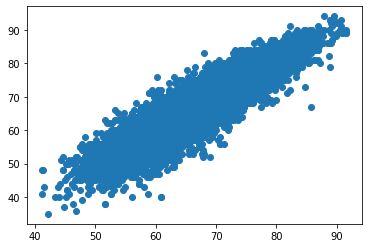

In [228]:
plt.scatter(y_pred, y_test)

In [229]:
# Decision Tree

In [230]:
dtreg = DecisionTreeRegressor()
model2 = dtreg.fit(X_train, y_train)

In [244]:
y_pred_dt = model2.predict(X_test)
print('RMSE : ', sqrt(mean_squared_error(y_pred_dt, y_test)))

RMSE :  1.3314276825597973


In [245]:
model2.score(X_train, y_train)

0.9993697829756966

In [246]:
model2.score(X_test, y_test)

0.9641127602342665

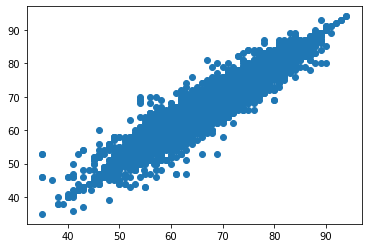

In [238]:
plt.scatter(y_pred_dt, y_test)

In [239]:
# XGBoost

In [241]:
import xgboost
xgb = xgboost.XGBRegressor()

In [242]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [247]:
y_pred_xgb = xgb.predict(X_test)
print('RMSE : ', sqrt(mean_squared_error(y_pred_xgb, y_test)))

RMSE :  1.7811440889386503


In [250]:
xgb.score(X_test, y_test)

0.9357751646847223

In [251]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
    'max_depth': range(1, 15, 3),
    'n_estimators': [10,50,100,200],
    #'min_child_weight' : range(1, 8, 2),
    'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    
    }

In [253]:
grid = GridSearchCV(xgboost.XGBRegressor(objective='reg:linear'), param_grid, verbose=3)

In [254]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[CV] gamma=0.0, learning_rate=1, max_depth=1, n_estimators=10 ........
[CV]  gamma=0.0, learning_rate=1, max_depth=1, n_estimators=10, score=0.7191766348853734, total=   1.0s
[CV] gamma=0.0, learning_rate=1, max_depth=1, n_estimators=10 ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  gamma=0.0, learning_rate=1, max_depth=1, n_estimators=10, score=0.7172233819238059, total=   1.0s
[CV] gamma=0.0, learning_rate=1, max_depth=1, n_estimators=10 ........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV]  gamma=0.0, learning_rate=1, max_depth=1, n_estimators=10, score=0.7216319636943376, total=   0.9s
[CV] gamma=0.0, learning_rate=1, max_depth=1, n_estimators=50 ........
[CV]  gamma=0.0, learning_rate=1, max_depth=1, n_estimators=50, score=0.8667399859859728, total=   3.0s
[CV] gamma=0.0, learning_rate=1, max_depth=1, n_estimators=50 ........
[CV]  gamma=0.0, learning_rate=1, max_depth=1, n_estimators=50, score=0.8691858158160899, total=   3.4s
[CV] gamma=0.0, learning_rate=1, max_depth=1, n_estimators=50 ........
[CV]  gamma=0.0, learning_rate=1, max_depth=1, n_estimators=50, score=0.8690989723495425, total=   3.1s
[CV] gamma=0.0, learning_rate=1, max_depth=1, n_estimators=100 .......
[CV]  gamma=0.0, learning_rate=1, max_depth=1, n_estimators=100, score=0.8995331712187998, total=   4.6s
[CV] gamma=0.0, learning_rate=1, max_depth=1, n_estimators=100 .......
[CV]  gamma=0.0, learning_rate=1, max_depth=1, n_estimators=100, score=0.9008610771854896, total=   6.8s
[CV] gamma=0.0, lea

[CV]  gamma=0.0, learning_rate=1, max_depth=13, n_estimators=10, score=0.9432787417271935, total=   6.0s
[CV] gamma=0.0, learning_rate=1, max_depth=13, n_estimators=10 .......
[CV]  gamma=0.0, learning_rate=1, max_depth=13, n_estimators=10, score=0.9447338606089332, total=   5.9s
[CV] gamma=0.0, learning_rate=1, max_depth=13, n_estimators=50 .......
[CV]  gamma=0.0, learning_rate=1, max_depth=13, n_estimators=50, score=0.9456542514322187, total=  29.1s
[CV] gamma=0.0, learning_rate=1, max_depth=13, n_estimators=50 .......
[CV]  gamma=0.0, learning_rate=1, max_depth=13, n_estimators=50, score=0.9469411150570812, total=  32.3s
[CV] gamma=0.0, learning_rate=1, max_depth=13, n_estimators=50 .......
[CV]  gamma=0.0, learning_rate=1, max_depth=13, n_estimators=50, score=0.9477953343695115, total=  34.4s
[CV] gamma=0.0, learning_rate=1, max_depth=13, n_estimators=100 ......
[CV]  gamma=0.0, learning_rate=1, max_depth=13, n_estimators=100, score=0.9456850833734185, total= 1.1min
[CV] gamma=0.0

[CV]  gamma=0.0, learning_rate=0.5, max_depth=10, n_estimators=10, score=0.9560901557768777, total=   9.3s
[CV] gamma=0.0, learning_rate=0.5, max_depth=10, n_estimators=10 .....
[CV]  gamma=0.0, learning_rate=0.5, max_depth=10, n_estimators=10, score=0.9566479864767176, total=   8.9s
[CV] gamma=0.0, learning_rate=0.5, max_depth=10, n_estimators=10 .....
[CV]  gamma=0.0, learning_rate=0.5, max_depth=10, n_estimators=10, score=0.9568467196640625, total=   5.7s
[CV] gamma=0.0, learning_rate=0.5, max_depth=10, n_estimators=50 .....
[CV]  gamma=0.0, learning_rate=0.5, max_depth=10, n_estimators=50, score=0.9715833081860213, total=  44.3s
[CV] gamma=0.0, learning_rate=0.5, max_depth=10, n_estimators=50 .....
[CV]  gamma=0.0, learning_rate=0.5, max_depth=10, n_estimators=50, score=0.9724575552753452, total=  56.0s
[CV] gamma=0.0, learning_rate=0.5, max_depth=10, n_estimators=50 .....
[CV]  gamma=0.0, learning_rate=0.5, max_depth=10, n_estimators=50, score=0.9725277608001076, total=  28.4s
[CV

[CV]  gamma=0.0, learning_rate=0.1, max_depth=4, n_estimators=200, score=0.962808453927037, total=  27.3s
[CV] gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=10 ......
[CV]  gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=10, score=-10.669557473628037, total=   3.0s
[CV] gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=10 ......
[CV]  gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=10, score=-10.556490206350675, total=   2.8s
[CV] gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=10 ......
[CV]  gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=10, score=-10.80586281158669, total=   3.2s
[CV] gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=50 ......
[CV]  gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=50, score=0.9571826369784231, total=  13.4s
[CV] gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=50 ......
[CV]  gamma=0.0, learning_rate=0.1, max_depth=7, n_estimators=50, score=0.9566591864791418, total=  13.4s
[CV] ga

[CV]  gamma=0.0, learning_rate=0.01, max_depth=1, n_estimators=200, score=-1.0818605964984043, total=  12.1s
[CV] gamma=0.0, learning_rate=0.01, max_depth=1, n_estimators=200 ....
[CV]  gamma=0.0, learning_rate=0.01, max_depth=1, n_estimators=200, score=-1.054787958988967, total=  10.1s
[CV] gamma=0.0, learning_rate=0.01, max_depth=1, n_estimators=200 ....
[CV]  gamma=0.0, learning_rate=0.01, max_depth=1, n_estimators=200, score=-1.100466064269603, total=   9.3s
[CV] gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=10 .....
[CV]  gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=10, score=-76.7444669713138, total=   1.6s
[CV] gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=10 .....
[CV]  gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=10, score=-76.02351883593467, total=   1.6s
[CV] gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=10 .....
[CV]  gamma=0.0, learning_rate=0.01, max_depth=4, n_estimators=10, score=-77.58187520749195, total=   1.6s


[CV]  gamma=0.0, learning_rate=0.01, max_depth=13, n_estimators=100, score=-11.709125072789124, total=  47.8s
[CV] gamma=0.0, learning_rate=0.01, max_depth=13, n_estimators=100 ...
[CV]  gamma=0.0, learning_rate=0.01, max_depth=13, n_estimators=100, score=-11.97761966948279, total=  49.3s
[CV] gamma=0.0, learning_rate=0.01, max_depth=13, n_estimators=200 ...
[CV]  gamma=0.0, learning_rate=0.01, max_depth=13, n_estimators=200, score=-0.770147870594033, total= 1.7min
[CV] gamma=0.0, learning_rate=0.01, max_depth=13, n_estimators=200 ...
[CV]  gamma=0.0, learning_rate=0.01, max_depth=13, n_estimators=200, score=-0.7510370548484833, total= 1.6min
[CV] gamma=0.0, learning_rate=0.01, max_depth=13, n_estimators=200 ...
[CV]  gamma=0.0, learning_rate=0.01, max_depth=13, n_estimators=200, score=-0.7877499987830943, total= 1.7min
[CV] gamma=0.0, learning_rate=0.001, max_depth=1, n_estimators=10 ....
[CV]  gamma=0.0, learning_rate=0.001, max_depth=1, n_estimators=10, score=-92.12252343204834, tot

[CV]  gamma=0.0, learning_rate=0.001, max_depth=10, n_estimators=50, score=-85.88764909669004, total=  18.8s
[CV] gamma=0.0, learning_rate=0.001, max_depth=10, n_estimators=100 ..
[CV]  gamma=0.0, learning_rate=0.001, max_depth=10, n_estimators=100, score=-76.80001170520016, total=  37.6s
[CV] gamma=0.0, learning_rate=0.001, max_depth=10, n_estimators=100 ..
[CV]  gamma=0.0, learning_rate=0.001, max_depth=10, n_estimators=100, score=-76.08019946972651, total=  36.5s
[CV] gamma=0.0, learning_rate=0.001, max_depth=10, n_estimators=100 ..
[CV]  gamma=0.0, learning_rate=0.001, max_depth=10, n_estimators=100, score=-77.63685873846235, total=  38.2s
[CV] gamma=0.0, learning_rate=0.001, max_depth=10, n_estimators=200 ..
[CV]  gamma=0.0, learning_rate=0.001, max_depth=10, n_estimators=200, score=-62.72398070610344, total= 1.2min
[CV] gamma=0.0, learning_rate=0.001, max_depth=10, n_estimators=200 ..
[CV]  gamma=0.0, learning_rate=0.001, max_depth=10, n_estimators=200, score=-62.13372402543567, 

[CV]  gamma=0.1, learning_rate=1, max_depth=7, n_estimators=50, score=0.9466894567582711, total=  21.8s
[CV] gamma=0.1, learning_rate=1, max_depth=7, n_estimators=50 ........
[CV]  gamma=0.1, learning_rate=1, max_depth=7, n_estimators=50, score=0.9470364096430359, total=  13.8s
[CV] gamma=0.1, learning_rate=1, max_depth=7, n_estimators=100 .......
[CV]  gamma=0.1, learning_rate=1, max_depth=7, n_estimators=100, score=0.9511857969962704, total=  28.8s
[CV] gamma=0.1, learning_rate=1, max_depth=7, n_estimators=100 .......
[CV]  gamma=0.1, learning_rate=1, max_depth=7, n_estimators=100, score=0.9516172877257344, total=  32.7s
[CV] gamma=0.1, learning_rate=1, max_depth=7, n_estimators=100 .......
[CV]  gamma=0.1, learning_rate=1, max_depth=7, n_estimators=100, score=0.9514872185401584, total=  32.5s
[CV] gamma=0.1, learning_rate=1, max_depth=7, n_estimators=200 .......
[CV]  gamma=0.1, learning_rate=1, max_depth=7, n_estimators=200, score=0.95415881056758, total= 1.0min
[CV] gamma=0.1, lea

[CV]  gamma=0.1, learning_rate=0.5, max_depth=4, n_estimators=50, score=0.9493373124447405, total=   7.1s
[CV] gamma=0.1, learning_rate=0.5, max_depth=4, n_estimators=50 ......
[CV]  gamma=0.1, learning_rate=0.5, max_depth=4, n_estimators=50, score=0.9497064378564963, total=   7.1s
[CV] gamma=0.1, learning_rate=0.5, max_depth=4, n_estimators=50 ......
[CV]  gamma=0.1, learning_rate=0.5, max_depth=4, n_estimators=50, score=0.9506129224516165, total=   7.2s
[CV] gamma=0.1, learning_rate=0.5, max_depth=4, n_estimators=100 .....
[CV]  gamma=0.1, learning_rate=0.5, max_depth=4, n_estimators=100, score=0.9609736498890125, total=  14.0s
[CV] gamma=0.1, learning_rate=0.5, max_depth=4, n_estimators=100 .....
[CV]  gamma=0.1, learning_rate=0.5, max_depth=4, n_estimators=100, score=0.959641834932565, total=  13.9s
[CV] gamma=0.1, learning_rate=0.5, max_depth=4, n_estimators=100 .....
[CV]  gamma=0.1, learning_rate=0.5, max_depth=4, n_estimators=100, score=0.9607093682087673, total=  14.6s
[CV] ga

[CV]  gamma=0.1, learning_rate=0.1, max_depth=1, n_estimators=10, score=-11.109406212477367, total=   0.9s
[CV] gamma=0.1, learning_rate=0.1, max_depth=1, n_estimators=50 ......
[CV]  gamma=0.1, learning_rate=0.1, max_depth=1, n_estimators=50, score=0.7589045116693196, total=   3.8s
[CV] gamma=0.1, learning_rate=0.1, max_depth=1, n_estimators=50 ......
[CV]  gamma=0.1, learning_rate=0.1, max_depth=1, n_estimators=50, score=0.7559463353354565, total=   3.0s
[CV] gamma=0.1, learning_rate=0.1, max_depth=1, n_estimators=50 ......
[CV]  gamma=0.1, learning_rate=0.1, max_depth=1, n_estimators=50, score=0.7633368466233633, total=   3.2s
[CV] gamma=0.1, learning_rate=0.1, max_depth=1, n_estimators=100 .....
[CV]  gamma=0.1, learning_rate=0.1, max_depth=1, n_estimators=100, score=0.829040376257853, total=   5.8s
[CV] gamma=0.1, learning_rate=0.1, max_depth=1, n_estimators=100 .....
[CV]  gamma=0.1, learning_rate=0.1, max_depth=1, n_estimators=100, score=0.8262850555017018, total=   4.7s
[CV] ga

[CV]  gamma=0.1, learning_rate=0.1, max_depth=13, n_estimators=10, score=-10.543262667046239, total=   4.5s
[CV] gamma=0.1, learning_rate=0.1, max_depth=13, n_estimators=10 .....
[CV]  gamma=0.1, learning_rate=0.1, max_depth=13, n_estimators=10, score=-10.788218092431372, total=   4.4s
[CV] gamma=0.1, learning_rate=0.1, max_depth=13, n_estimators=50 .....
[CV]  gamma=0.1, learning_rate=0.1, max_depth=13, n_estimators=50, score=0.9738533156456817, total=  27.8s
[CV] gamma=0.1, learning_rate=0.1, max_depth=13, n_estimators=50 .....
[CV]  gamma=0.1, learning_rate=0.1, max_depth=13, n_estimators=50, score=0.9732936293434836, total=  28.1s
[CV] gamma=0.1, learning_rate=0.1, max_depth=13, n_estimators=50 .....
[CV]  gamma=0.1, learning_rate=0.1, max_depth=13, n_estimators=50, score=0.9743797746222642, total=  28.0s
[CV] gamma=0.1, learning_rate=0.1, max_depth=13, n_estimators=100 ....
[CV]  gamma=0.1, learning_rate=0.1, max_depth=13, n_estimators=100, score=0.982399252749059, total=  58.8s
[

[CV]  gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=200, score=-0.8028364135536961, total= 1.0min
[CV] gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=10 ....
[CV]  gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=10, score=-76.72961578993669, total=   4.5s
[CV] gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=10 ....
[CV]  gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=10, score=-76.01065379722354, total=   3.7s
[CV] gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=10 ....
[CV]  gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=10, score=-77.56591763328369, total=   3.7s
[CV] gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=50 ....
[CV]  gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=50, score=-33.87591460861888, total=  27.2s
[CV] gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=50 ....
[CV]  gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=50, score=-33.5470730821544, total=  19.

[CV]  gamma=0.1, learning_rate=0.001, max_depth=4, n_estimators=200, score=-62.75138756930402, total=  26.4s
[CV] gamma=0.1, learning_rate=0.001, max_depth=4, n_estimators=200 ...
[CV]  gamma=0.1, learning_rate=0.001, max_depth=4, n_estimators=200, score=-62.15556797579205, total=  27.4s
[CV] gamma=0.1, learning_rate=0.001, max_depth=4, n_estimators=200 ...
[CV]  gamma=0.1, learning_rate=0.001, max_depth=4, n_estimators=200, score=-63.44365203765392, total=  26.7s
[CV] gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=10 ....
[CV]  gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=10, score=-92.11484924774926, total=   2.8s
[CV] gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=10 ....
[CV]  gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=10, score=-91.25439730199163, total=   2.7s
[CV] gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=10 ....
[CV]  gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=10, score=-93.1085904429031, total=   

[CV]  gamma=0.2, learning_rate=1, max_depth=1, n_estimators=100, score=0.9008610771854896, total=   4.4s
[CV] gamma=0.2, learning_rate=1, max_depth=1, n_estimators=100 .......
[CV]  gamma=0.2, learning_rate=1, max_depth=1, n_estimators=100, score=0.9000972404895621, total=   4.4s
[CV] gamma=0.2, learning_rate=1, max_depth=1, n_estimators=200 .......
[CV]  gamma=0.2, learning_rate=1, max_depth=1, n_estimators=200, score=0.9166390726612909, total=   8.3s
[CV] gamma=0.2, learning_rate=1, max_depth=1, n_estimators=200 .......
[CV]  gamma=0.2, learning_rate=1, max_depth=1, n_estimators=200, score=0.9170645421282231, total=   9.0s
[CV] gamma=0.2, learning_rate=1, max_depth=1, n_estimators=200 .......
[CV]  gamma=0.2, learning_rate=1, max_depth=1, n_estimators=200, score=0.9170021142326464, total=   8.4s
[CV] gamma=0.2, learning_rate=1, max_depth=4, n_estimators=10 ........
[CV]  gamma=0.2, learning_rate=1, max_depth=4, n_estimators=10, score=0.8936205461897743, total=   1.7s
[CV] gamma=0.2, 

[CV]  gamma=0.2, learning_rate=1, max_depth=13, n_estimators=100, score=0.9460352765273776, total=  55.9s
[CV] gamma=0.2, learning_rate=1, max_depth=13, n_estimators=100 ......
[CV]  gamma=0.2, learning_rate=1, max_depth=13, n_estimators=100, score=0.9467232346610567, total=  52.3s
[CV] gamma=0.2, learning_rate=1, max_depth=13, n_estimators=100 ......
[CV]  gamma=0.2, learning_rate=1, max_depth=13, n_estimators=100, score=0.9480948236225224, total=  54.8s
[CV] gamma=0.2, learning_rate=1, max_depth=13, n_estimators=200 ......
[CV]  gamma=0.2, learning_rate=1, max_depth=13, n_estimators=200, score=0.9460429205805072, total= 1.7min
[CV] gamma=0.2, learning_rate=1, max_depth=13, n_estimators=200 ......
[CV]  gamma=0.2, learning_rate=1, max_depth=13, n_estimators=200, score=0.9467232324497673, total= 1.7min
[CV] gamma=0.2, learning_rate=1, max_depth=13, n_estimators=200 ......
[CV]  gamma=0.2, learning_rate=1, max_depth=13, n_estimators=200, score=0.9480948236225224, total= 1.7min
[CV] gamm

[CV]  gamma=0.2, learning_rate=0.5, max_depth=10, n_estimators=50, score=0.9722521203599466, total=  20.2s
[CV] gamma=0.2, learning_rate=0.5, max_depth=10, n_estimators=100 ....
[CV]  gamma=0.2, learning_rate=0.5, max_depth=10, n_estimators=100, score=0.9746126806550718, total=  39.8s
[CV] gamma=0.2, learning_rate=0.5, max_depth=10, n_estimators=100 ....
[CV]  gamma=0.2, learning_rate=0.5, max_depth=10, n_estimators=100, score=0.974811687105885, total=  39.8s
[CV] gamma=0.2, learning_rate=0.5, max_depth=10, n_estimators=100 ....
[CV]  gamma=0.2, learning_rate=0.5, max_depth=10, n_estimators=100, score=0.9753223521891866, total=  39.8s
[CV] gamma=0.2, learning_rate=0.5, max_depth=10, n_estimators=200 ....
[CV]  gamma=0.2, learning_rate=0.5, max_depth=10, n_estimators=200, score=0.9753570708787734, total= 1.3min
[CV] gamma=0.2, learning_rate=0.5, max_depth=10, n_estimators=200 ....
[CV]  gamma=0.2, learning_rate=0.5, max_depth=10, n_estimators=200, score=0.9756271860999391, total= 1.3min

[CV]  gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=50, score=0.9566205782360052, total=  13.1s
[CV] gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=50 ......
[CV]  gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=50, score=0.9586474439237148, total=  13.6s
[CV] gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=100 .....
[CV]  gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=100, score=0.9701919497145194, total=  25.7s
[CV] gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=100 .....
[CV]  gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=100, score=0.9696603704417646, total=  25.9s
[CV] gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=100 .....
[CV]  gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=100, score=0.9710972393417884, total=  25.9s
[CV] gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=200 .....
[CV]  gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=200, score=0.9755145199149904, total=  50.7s
[CV] 

[CV]  gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=10, score=-77.58187520749195, total=   1.6s
[CV] gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=50 .....
[CV]  gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=50, score=-33.93031951403223, total=  12.8s
[CV] gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=50 .....
[CV]  gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=50, score=-33.596252669416366, total=  10.6s
[CV] gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=50 .....
[CV]  gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=50, score=-34.31804052899008, total=   9.8s
[CV] gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=100 ....
[CV]  gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=100, score=-11.909333973163818, total=  20.1s
[CV] gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=100 ....
[CV]  gamma=0.2, learning_rate=0.01, max_depth=4, n_estimators=100, score=-11.781684945796354, total=  22.5

[CV]  gamma=0.2, learning_rate=0.001, max_depth=1, n_estimators=10, score=-92.12252343204834, total=   0.7s
[CV] gamma=0.2, learning_rate=0.001, max_depth=1, n_estimators=10 ....
[CV]  gamma=0.2, learning_rate=0.001, max_depth=1, n_estimators=10, score=-91.26158507275072, total=   0.8s
[CV] gamma=0.2, learning_rate=0.001, max_depth=1, n_estimators=10 ....
[CV]  gamma=0.2, learning_rate=0.001, max_depth=1, n_estimators=10, score=-93.11576443815474, total=   0.8s
[CV] gamma=0.2, learning_rate=0.001, max_depth=1, n_estimators=50 ....
[CV]  gamma=0.2, learning_rate=0.001, max_depth=1, n_estimators=50, score=-85.00557473908329, total=   2.5s
[CV] gamma=0.2, learning_rate=0.001, max_depth=1, n_estimators=50 ....
[CV]  gamma=0.2, learning_rate=0.001, max_depth=1, n_estimators=50, score=-84.2072864082087, total=   2.4s
[CV] gamma=0.2, learning_rate=0.001, max_depth=1, n_estimators=50 ....
[CV]  gamma=0.2, learning_rate=0.001, max_depth=1, n_estimators=50, score=-85.92335866912518, total=   2.5

[CV]  gamma=0.2, learning_rate=0.001, max_depth=10, n_estimators=200, score=-62.13372467936029, total= 1.4min
[CV] gamma=0.2, learning_rate=0.001, max_depth=10, n_estimators=200 ..
[CV]  gamma=0.2, learning_rate=0.001, max_depth=10, n_estimators=200, score=-63.41431461790789, total= 1.6min
[CV] gamma=0.2, learning_rate=0.001, max_depth=13, n_estimators=10 ...
[CV]  gamma=0.2, learning_rate=0.001, max_depth=13, n_estimators=10, score=-92.11454449624232, total=   4.2s
[CV] gamma=0.2, learning_rate=0.001, max_depth=13, n_estimators=10 ...
[CV]  gamma=0.2, learning_rate=0.001, max_depth=13, n_estimators=10, score=-91.25425293118832, total=   4.2s
[CV] gamma=0.2, learning_rate=0.001, max_depth=13, n_estimators=10 ...
[CV]  gamma=0.2, learning_rate=0.001, max_depth=13, n_estimators=10, score=-93.10821997583356, total=   4.2s
[CV] gamma=0.2, learning_rate=0.001, max_depth=13, n_estimators=50 ...
[CV]  gamma=0.2, learning_rate=0.001, max_depth=13, n_estimators=50, score=-84.9667721083426, tota

[CV]  gamma=0.3, learning_rate=1, max_depth=7, n_estimators=200, score=0.9549021179548505, total= 1.0min
[CV] gamma=0.3, learning_rate=1, max_depth=7, n_estimators=200 .......
[CV]  gamma=0.3, learning_rate=1, max_depth=7, n_estimators=200, score=0.9552342842886449, total= 1.1min
[CV] gamma=0.3, learning_rate=1, max_depth=7, n_estimators=200 .......
[CV]  gamma=0.3, learning_rate=1, max_depth=7, n_estimators=200, score=0.9544797695328806, total= 1.0min
[CV] gamma=0.3, learning_rate=1, max_depth=10, n_estimators=10 .......
[CV]  gamma=0.3, learning_rate=1, max_depth=10, n_estimators=10, score=0.9317075416667169, total=   5.4s
[CV] gamma=0.3, learning_rate=1, max_depth=10, n_estimators=10 .......
[CV]  gamma=0.3, learning_rate=1, max_depth=10, n_estimators=10, score=0.9380298482995206, total=   6.3s
[CV] gamma=0.3, learning_rate=1, max_depth=10, n_estimators=10 .......
[CV]  gamma=0.3, learning_rate=1, max_depth=10, n_estimators=10, score=0.9379760537495251, total=   5.7s
[CV] gamma=0.3,

[CV]  gamma=0.3, learning_rate=0.5, max_depth=4, n_estimators=100, score=0.9607093682087673, total=  22.5s
[CV] gamma=0.3, learning_rate=0.5, max_depth=4, n_estimators=200 .....
[CV]  gamma=0.3, learning_rate=0.5, max_depth=4, n_estimators=200, score=0.9692320524625441, total=  44.8s
[CV] gamma=0.3, learning_rate=0.5, max_depth=4, n_estimators=200 .....
[CV]  gamma=0.3, learning_rate=0.5, max_depth=4, n_estimators=200, score=0.967465903169565, total=  45.6s
[CV] gamma=0.3, learning_rate=0.5, max_depth=4, n_estimators=200 .....
[CV]  gamma=0.3, learning_rate=0.5, max_depth=4, n_estimators=200, score=0.9685776280974681, total=  50.5s
[CV] gamma=0.3, learning_rate=0.5, max_depth=7, n_estimators=10 ......
[CV]  gamma=0.3, learning_rate=0.5, max_depth=7, n_estimators=10, score=0.9425934972372065, total=   4.5s
[CV] gamma=0.3, learning_rate=0.5, max_depth=7, n_estimators=10 ......
[CV]  gamma=0.3, learning_rate=0.5, max_depth=7, n_estimators=10, score=0.9428038022631491, total=   5.8s
[CV] g

[CV]  gamma=0.3, learning_rate=0.1, max_depth=1, n_estimators=100, score=0.8262850555017018, total=   6.1s
[CV] gamma=0.3, learning_rate=0.1, max_depth=1, n_estimators=100 .....
[CV]  gamma=0.3, learning_rate=0.1, max_depth=1, n_estimators=100, score=0.8325668981128069, total=   5.5s
[CV] gamma=0.3, learning_rate=0.1, max_depth=1, n_estimators=200 .....
[CV]  gamma=0.3, learning_rate=0.1, max_depth=1, n_estimators=200, score=0.8640370901368833, total=   9.7s
[CV] gamma=0.3, learning_rate=0.1, max_depth=1, n_estimators=200 .....
[CV]  gamma=0.3, learning_rate=0.1, max_depth=1, n_estimators=200, score=0.8615681235835974, total=  10.0s
[CV] gamma=0.3, learning_rate=0.1, max_depth=1, n_estimators=200 .....
[CV]  gamma=0.3, learning_rate=0.1, max_depth=1, n_estimators=200, score=0.8664615512882228, total=  10.2s
[CV] gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=10 ......
[CV]  gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=10, score=-10.734267164164065, total=   2.0s
[CV

[CV]  gamma=0.3, learning_rate=0.1, max_depth=13, n_estimators=100, score=0.9823732098327207, total= 1.0min
[CV] gamma=0.3, learning_rate=0.1, max_depth=13, n_estimators=100 ....
[CV]  gamma=0.3, learning_rate=0.1, max_depth=13, n_estimators=100, score=0.981544866653491, total=  58.3s
[CV] gamma=0.3, learning_rate=0.1, max_depth=13, n_estimators=100 ....
[CV]  gamma=0.3, learning_rate=0.1, max_depth=13, n_estimators=100, score=0.982856768879634, total=  59.3s
[CV] gamma=0.3, learning_rate=0.1, max_depth=13, n_estimators=200 ....
[CV]  gamma=0.3, learning_rate=0.1, max_depth=13, n_estimators=200, score=0.9838446933197633, total= 1.9min
[CV] gamma=0.3, learning_rate=0.1, max_depth=13, n_estimators=200 ....
[CV]  gamma=0.3, learning_rate=0.1, max_depth=13, n_estimators=200, score=0.9831758660153632, total= 1.9min
[CV] gamma=0.3, learning_rate=0.1, max_depth=13, n_estimators=200 ....
[CV]  gamma=0.3, learning_rate=0.1, max_depth=13, n_estimators=200, score=0.9843884484601176, total= 2.0min

[CV]  gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=50, score=-33.5470730821544, total=  17.0s
[CV] gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=50 ....
[CV]  gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=50, score=-34.259799701693936, total=  17.9s
[CV] gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=100 ...
[CV]  gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=100, score=-11.83790176822797, total=  36.6s
[CV] gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=100 ...
[CV]  gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=100, score=-11.710254518791904, total=  36.0s
[CV] gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=100 ...
[CV]  gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=100, score=-11.979575126158034, total=  36.3s
[CV] gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=200 ...
[CV]  gamma=0.3, learning_rate=0.01, max_depth=10, n_estimators=200, score=-0.7730566671916885, tota

[CV]  gamma=0.3, learning_rate=0.001, max_depth=7, n_estimators=10, score=-93.1085904429031, total=   3.2s
[CV] gamma=0.3, learning_rate=0.001, max_depth=7, n_estimators=50 ....
[CV]  gamma=0.3, learning_rate=0.001, max_depth=7, n_estimators=50, score=-84.96762690737556, total=  14.1s
[CV] gamma=0.3, learning_rate=0.001, max_depth=7, n_estimators=50 ....
[CV]  gamma=0.3, learning_rate=0.001, max_depth=7, n_estimators=50, score=-84.17273808575864, total=  16.9s
[CV] gamma=0.3, learning_rate=0.001, max_depth=7, n_estimators=50 ....
[CV]  gamma=0.3, learning_rate=0.001, max_depth=7, n_estimators=50, score=-85.88931648007218, total=  14.0s
[CV] gamma=0.3, learning_rate=0.001, max_depth=7, n_estimators=100 ...
[CV]  gamma=0.3, learning_rate=0.001, max_depth=7, n_estimators=100, score=-76.80150336431636, total=  31.4s
[CV] gamma=0.3, learning_rate=0.001, max_depth=7, n_estimators=100 ...
[CV]  gamma=0.3, learning_rate=0.001, max_depth=7, n_estimators=100, score=-76.08196582516501, total=  27

[CV]  gamma=0.4, learning_rate=1, max_depth=4, n_estimators=10, score=0.8936205461897743, total=   2.1s
[CV] gamma=0.4, learning_rate=1, max_depth=4, n_estimators=10 ........
[CV]  gamma=0.4, learning_rate=1, max_depth=4, n_estimators=10, score=0.8948455664722766, total=   1.9s
[CV] gamma=0.4, learning_rate=1, max_depth=4, n_estimators=10 ........
[CV]  gamma=0.4, learning_rate=1, max_depth=4, n_estimators=10, score=0.9013989716796813, total=   1.6s
[CV] gamma=0.4, learning_rate=1, max_depth=4, n_estimators=50 ........
[CV]  gamma=0.4, learning_rate=1, max_depth=4, n_estimators=50, score=0.9428937293232932, total=   7.0s
[CV] gamma=0.4, learning_rate=1, max_depth=4, n_estimators=50 ........
[CV]  gamma=0.4, learning_rate=1, max_depth=4, n_estimators=50, score=0.942105211561545, total=   6.9s
[CV] gamma=0.4, learning_rate=1, max_depth=4, n_estimators=50 ........
[CV]  gamma=0.4, learning_rate=1, max_depth=4, n_estimators=50, score=0.9444617886331389, total=   6.9s
[CV] gamma=0.4, learni

[CV]  gamma=0.4, learning_rate=1, max_depth=13, n_estimators=200, score=0.9474461482369022, total= 1.7min
[CV] gamma=0.4, learning_rate=0.5, max_depth=1, n_estimators=10 ......
[CV]  gamma=0.4, learning_rate=0.5, max_depth=1, n_estimators=10, score=0.7298884042152363, total=   0.7s
[CV] gamma=0.4, learning_rate=0.5, max_depth=1, n_estimators=10 ......
[CV]  gamma=0.4, learning_rate=0.5, max_depth=1, n_estimators=10, score=0.7260968042343976, total=   0.8s
[CV] gamma=0.4, learning_rate=0.5, max_depth=1, n_estimators=10 ......
[CV]  gamma=0.4, learning_rate=0.5, max_depth=1, n_estimators=10, score=0.7320692798357986, total=   0.8s
[CV] gamma=0.4, learning_rate=0.5, max_depth=1, n_estimators=50 ......
[CV]  gamma=0.4, learning_rate=0.5, max_depth=1, n_estimators=50, score=0.8485472001813494, total=   2.3s
[CV] gamma=0.4, learning_rate=0.5, max_depth=1, n_estimators=50 ......
[CV]  gamma=0.4, learning_rate=0.5, max_depth=1, n_estimators=50, score=0.8474125089218693, total=   2.5s
[CV] gamm

[CV]  gamma=0.4, learning_rate=0.5, max_depth=10, n_estimators=200, score=0.9754921445847914, total= 1.4min
[CV] gamma=0.4, learning_rate=0.5, max_depth=10, n_estimators=200 ....
[CV]  gamma=0.4, learning_rate=0.5, max_depth=10, n_estimators=200, score=0.975826864875884, total= 1.4min
[CV] gamma=0.4, learning_rate=0.5, max_depth=13, n_estimators=10 .....
[CV]  gamma=0.4, learning_rate=0.5, max_depth=13, n_estimators=10, score=0.9632056047100995, total=   6.3s
[CV] gamma=0.4, learning_rate=0.5, max_depth=13, n_estimators=10 .....
[CV]  gamma=0.4, learning_rate=0.5, max_depth=13, n_estimators=10, score=0.9631306576190471, total=   6.1s
[CV] gamma=0.4, learning_rate=0.5, max_depth=13, n_estimators=10 .....
[CV]  gamma=0.4, learning_rate=0.5, max_depth=13, n_estimators=10, score=0.9649567263448897, total=   6.1s
[CV] gamma=0.4, learning_rate=0.5, max_depth=13, n_estimators=50 .....
[CV]  gamma=0.4, learning_rate=0.5, max_depth=13, n_estimators=50, score=0.9731372019764369, total=  31.0s
[C

[CV]  gamma=0.4, learning_rate=0.1, max_depth=7, n_estimators=200, score=0.9752678377647032, total=  53.0s
[CV] gamma=0.4, learning_rate=0.1, max_depth=7, n_estimators=200 .....
[CV]  gamma=0.4, learning_rate=0.1, max_depth=7, n_estimators=200, score=0.9746836104449534, total=  53.8s
[CV] gamma=0.4, learning_rate=0.1, max_depth=7, n_estimators=200 .....
[CV]  gamma=0.4, learning_rate=0.1, max_depth=7, n_estimators=200, score=0.9759931419280459, total=  53.1s
[CV] gamma=0.4, learning_rate=0.1, max_depth=10, n_estimators=10 .....
[CV]  gamma=0.4, learning_rate=0.1, max_depth=10, n_estimators=10, score=-10.65717428434483, total=   3.9s
[CV] gamma=0.4, learning_rate=0.1, max_depth=10, n_estimators=10 .....
[CV]  gamma=0.4, learning_rate=0.1, max_depth=10, n_estimators=10, score=-10.546494478597536, total=   4.0s
[CV] gamma=0.4, learning_rate=0.1, max_depth=10, n_estimators=10 .....
[CV]  gamma=0.4, learning_rate=0.1, max_depth=10, n_estimators=10, score=-10.790828216315676, total=   4.0s
[

[CV]  gamma=0.4, learning_rate=0.01, max_depth=4, n_estimators=100, score=-11.781684945796354, total=  22.6s
[CV] gamma=0.4, learning_rate=0.01, max_depth=4, n_estimators=100 ....
[CV]  gamma=0.4, learning_rate=0.01, max_depth=4, n_estimators=100, score=-12.056399929891764, total=  20.0s
[CV] gamma=0.4, learning_rate=0.01, max_depth=4, n_estimators=200 ....
[CV]  gamma=0.4, learning_rate=0.01, max_depth=4, n_estimators=200, score=-0.8322370062049596, total=  40.6s
[CV] gamma=0.4, learning_rate=0.01, max_depth=4, n_estimators=200 ....
[CV]  gamma=0.4, learning_rate=0.01, max_depth=4, n_estimators=200, score=-0.8132391362686244, total=  42.2s
[CV] gamma=0.4, learning_rate=0.01, max_depth=4, n_estimators=200 ....
[CV]  gamma=0.4, learning_rate=0.01, max_depth=4, n_estimators=200, score=-0.851400677464444, total=  42.6s
[CV] gamma=0.4, learning_rate=0.01, max_depth=7, n_estimators=10 .....
[CV]  gamma=0.4, learning_rate=0.01, max_depth=7, n_estimators=10, score=-76.73104801822613, total=  

[CV]  gamma=0.4, learning_rate=0.001, max_depth=1, n_estimators=50, score=-85.92335866912518, total=   3.1s
[CV] gamma=0.4, learning_rate=0.001, max_depth=1, n_estimators=100 ...
[CV]  gamma=0.4, learning_rate=0.001, max_depth=1, n_estimators=100, score=-76.87469190954448, total=   6.6s
[CV] gamma=0.4, learning_rate=0.001, max_depth=1, n_estimators=100 ...
[CV]  gamma=0.4, learning_rate=0.001, max_depth=1, n_estimators=100, score=-76.14697905015495, total=   6.6s
[CV] gamma=0.4, learning_rate=0.001, max_depth=1, n_estimators=100 ...
[CV]  gamma=0.4, learning_rate=0.001, max_depth=1, n_estimators=100, score=-77.70516618983086, total=   6.2s
[CV] gamma=0.4, learning_rate=0.001, max_depth=1, n_estimators=200 ...
[CV]  gamma=0.4, learning_rate=0.001, max_depth=1, n_estimators=200, score=-62.85990590299885, total=  12.1s
[CV] gamma=0.4, learning_rate=0.001, max_depth=1, n_estimators=200 ...
[CV]  gamma=0.4, learning_rate=0.001, max_depth=1, n_estimators=200, score=-62.25379848041995, total=

[CV]  gamma=0.4, learning_rate=0.001, max_depth=13, n_estimators=50, score=-84.9667721083426, total=  19.9s
[CV] gamma=0.4, learning_rate=0.001, max_depth=13, n_estimators=50 ...
[CV]  gamma=0.4, learning_rate=0.001, max_depth=13, n_estimators=50, score=-84.1720186466073, total=  19.9s
[CV] gamma=0.4, learning_rate=0.001, max_depth=13, n_estimators=50 ...
[CV]  gamma=0.4, learning_rate=0.001, max_depth=13, n_estimators=50, score=-85.88764758561356, total=  20.7s
[CV] gamma=0.4, learning_rate=0.001, max_depth=13, n_estimators=100 ..
[CV]  gamma=0.4, learning_rate=0.001, max_depth=13, n_estimators=100, score=-76.7997926016213, total=  40.0s
[CV] gamma=0.4, learning_rate=0.001, max_depth=13, n_estimators=100 ..
[CV]  gamma=0.4, learning_rate=0.001, max_depth=13, n_estimators=100, score=-76.0802191736931, total=  39.3s
[CV] gamma=0.4, learning_rate=0.001, max_depth=13, n_estimators=100 ..
[CV]  gamma=0.4, learning_rate=0.001, max_depth=13, n_estimators=100, score=-77.63676264841531, total=

[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 1153.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': range(1, 15, 3), 'n_estimators': [10, 50, 100, 200], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [255]:
grid.best_params_

{'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 13, 'n_estimators': 200}

In [256]:
new_model = xgboost.XGBRegressor(gamma = 0.0, learning_rate = 0.1, max_depth = 13, n_estimators = 200)
new_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_delta_step=0,
       max_depth=13, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [259]:
y_pred_xgboost_new = new_model.predict(X_test)
print('RMSE : ', sqrt(mean_squared_error(y_pred_xgboost_new, y_test)))

RMSE :  0.7823424495596344


In [260]:
new_model.score(X_test, y_test)

0.9876092189617618

In [ ]:
# It can be clearly observed that XGBoost model provides a better score in comparison to Linear Regression and Decision Trees. 
# After applying GridSearchCV on the XGBoost we got better parameters and our score improved. Hence we will go ahead with XGBoost model for predicting the player ratings.